In [2]:
!pip install numpy pandas matplotlib scikit-learn yfinance tensorflow



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model


In [4]:
data = yf.download('RELIANCE.NS', start='2015-01-01', end='2025-01-01')
data.head()


C:\Users\hawsh\AppData\Local\Temp\ipykernel_1852\212955482.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('RELIANCE.NS', start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2015-01-01,189.999802,190.877155,189.090351,189.657431,2963643
2015-01-02,189.496933,191.743813,189.229456,190.042601,7331366
2015-01-05,187.421265,190.641790,187.046782,189.379255,10103941
2015-01-06,178.915253,186.811408,178.037899,186.169449,18627980
2015-01-07,182.809814,183.772761,179.107830,179.129229,20720312


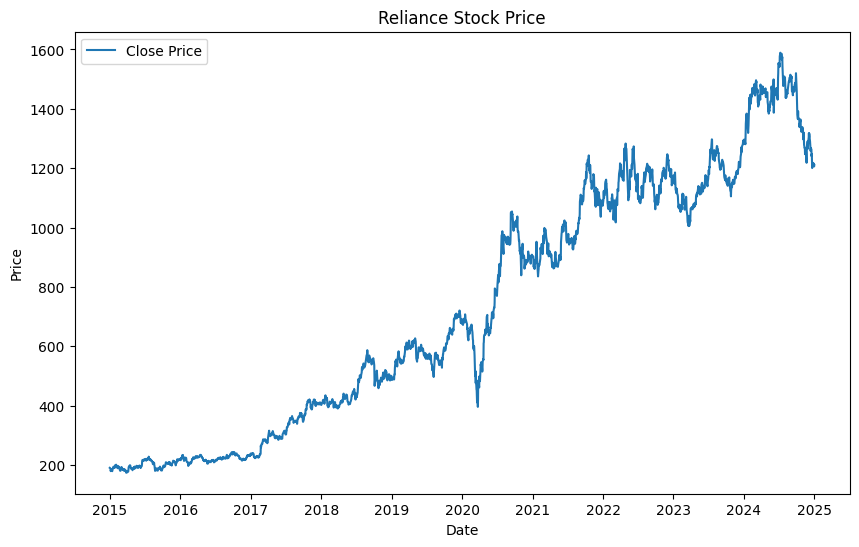

In [5]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Close Price')
plt.title('Reliance Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))

training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]


In [7]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# reshape into [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\hawsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0120 - val_loss: 6.4895e-04
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.6102e-04 - val_loss: 6.8807e-04
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5428e-04 - val_loss: 0.0010
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.0921e-04 - val_loss: 5.8001e-04
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0518e-04 - val_loss: 6.1548e-04
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.7659e-04 - val_loss: 9.4382e-04
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0626e-04 - val_loss: 6.0134e-04
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.4431e-04 - val_loss: 5.1684e-04
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7698e-04 - val_loss: 4.7733e-04
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1894e-04 - val_loss: 4.4334e-04
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1599e-04 - val_

In [10]:
model.save('stock_model.h5')
print("✅ Model saved successfully as stock_model.h5")


✅ Model saved successfully as stock_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


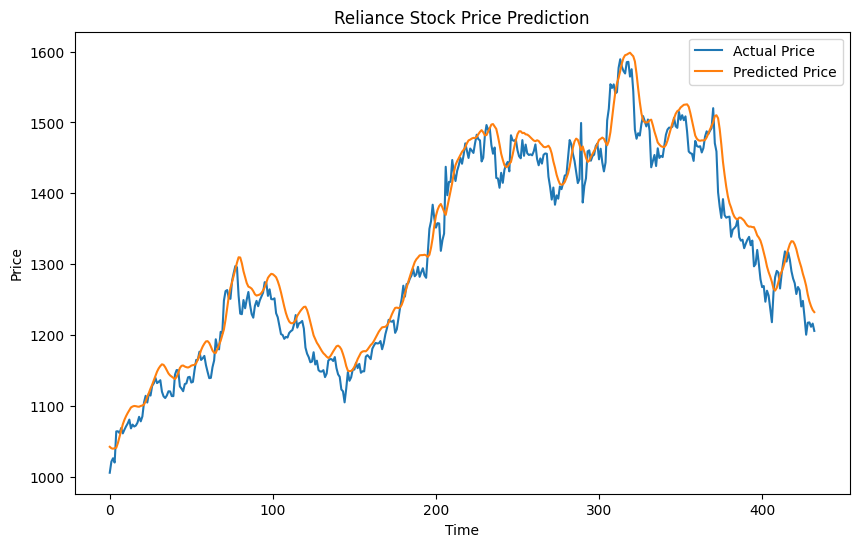

In [11]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [12]:
loaded_model = load_model('stock_model.h5')
